In [1]:
!gdown 1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
!gdown 1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100% 97.3M/97.3M [00:01<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100% 15.6M/15.6M [00:00<00:00, 52.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
From (redirected): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&confirm=t&uuid=59aadbc5-76d2-426b-a5e0-2569150717b8
To: /content/train_data.csv
100% 635M/635M [00:03<00:00, 199MB/s]


In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
Train_data = pd.read_csv('train_data.csv')
Test_data = pd.read_csv('test_data.csv')
Title_brand = pd.read_csv('title_brand.csv')

<ipython-input-3-4ac451dfce34>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Train_data = pd.read_csv('train_data.csv')


In [4]:
Train_data.sample(3)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
95128,5,NaN,True,2016-07-13,A3JCNVE7SN3JOQ,B004ZKXXAK,NaN,Abby,This keyboard has been a really good piece of ...,Reliable keyboard.,1468368000
229823,5,NaN,True,2016-06-05,AH795UAOPCFHT,B00GDHAT3W,{'Color:': ' Green/Gray'},Windtrix,I watched the video from the other reviewer an...,Easy to put on!,1465084800
559364,3,NaN,True,2016-01-15,AVDO05K62RE5N,B016C6Z1OA,{'Color:': ' Lava Red'},Monkey,I ordered the red pair because I already own 2...,"Great headphones for the money, but be careful...",1452816000


In [5]:
Test_data.sample(3)

,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
15000,NaN,True,2018-03-29,ABEZNVAX64JT5,B00RNKGEZU,NaN,A. L. DeWitt,I have a Nikon D-800 with battery grip. I hav...,"Bag is smaller internally than shown, but othe...",1522281600
18660,NaN,True,2018-04-06,A2E8AYP5PBVCIP,B004L9GWSK,NaN,Dennis Cummins,"As an audiophile, I am very happy with these. ...",Are wall speakers a bad buy??,1522972800
19982,6.0,True,2016-03-29,AN17Z00NUJW0V,B00QG21HBC,NaN,Kate Mahoney,I have become a big fan of Tech Armor products...,Perfect protection for my autistic 3 year old ...,1459209600


In [9]:
Title_brand.sample(3)

,asin,title,brand
733596,B01BTJFC2Q,"Garmin Fenix 3 HR, Gray",Garmin
106860,B000RTKNDS,Delkin Devices DDSS-SINGLE SensorScope Include...,Delkin
477959,B00IZEBL9C,iPad Air Case - Ruban 360 Degree Rotating Stan...,RUBAN


In [10]:
x = Train_data['overall'].value_counts()
x

,count
overall,
5,461485
4,156514
1,82950
3,81239
2,56756


In [11]:
Train_data['overall'].values

array([2, 5, 4, ..., 3, 5, 5])

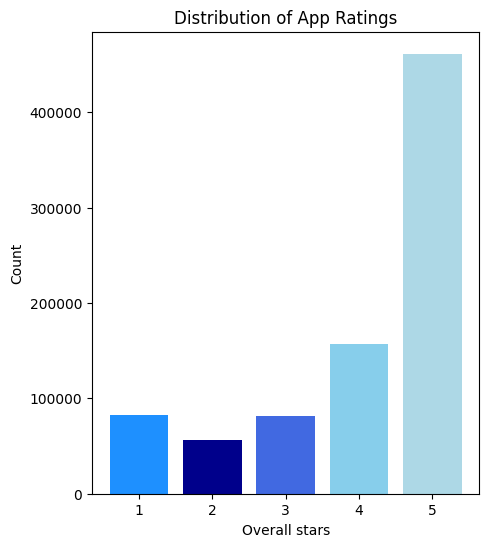

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

values = Train_data['overall'].value_counts().index
counts = Train_data['overall'].value_counts().values

color_list = ["#ADD8E6", "#87CEEB", "#1E90FF", "#4169E1", "#00008B"]
plt.figure(figsize=(5, 6))
plt.bar(values, counts, color=color_list)
plt.xlabel('Overall stars')
plt.ylabel('Count')
plt.title('Distribution of App Ratings')
plt.show()

<h3 align=right style="line-height:200%;font-family:mitra;color: #0099cc">
<font face="mitra">معتدل نبودن تعداد کلاس‌ها برای آموزش، راهکار:</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:mitra;font-size:medium">
<font face="mitra" size=3>
برای اینکار می‌توان چندین کار انجام داد، اول آنکه می‌توان تعدادی از کلاس 5 را دور ریخت که مجموعه داده متوازن بشود.</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:mitra;font-size:medium;">
<font face="mitra" size=3>
یا می‌توان بقیه کلاس‌ها را به حد کلاس 5 رساند به این صورت که به سایز کلاس 5 برسد. یعنی می‌توان برای مثال از هر سطر تعدادی را اضافه استفاده کرد.</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:mitra;font-size:medium">
<font face="mitra" size=3>
از weighted loss هم می‌توان بهره برد به این صورت که وزن کلاس 5 در آموزش مدل کمتر باشد که پیش بینی درستی را شاهد باشیم.</font>
</p>

---------------------------------------------------
**Question 2**

<ipython-input-4-d8c7befc422b>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_data.csv')


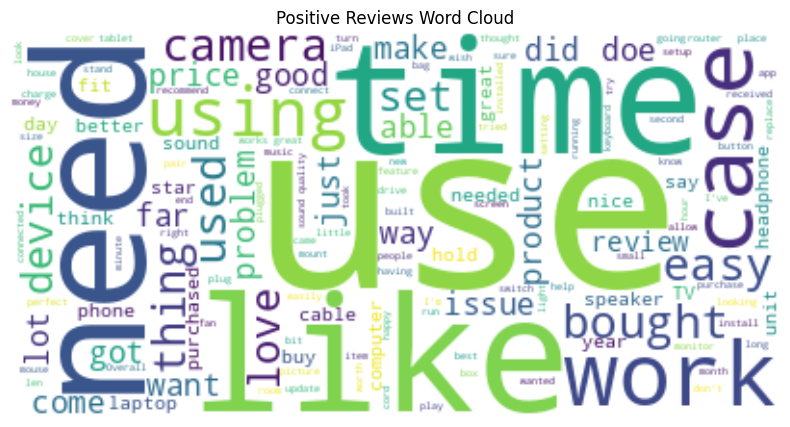

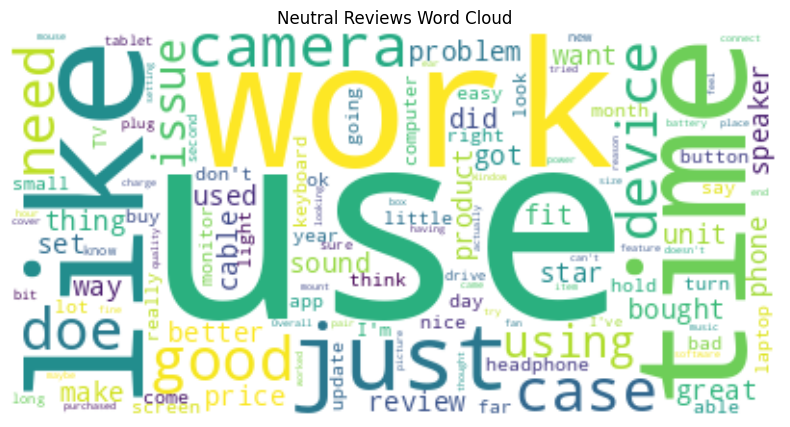

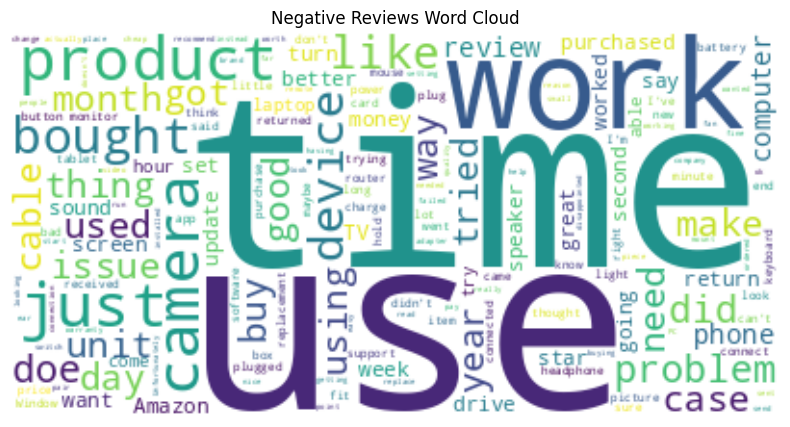

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

data = pd.read_csv('train_data.csv')

positive_reviews = data[data['overall'].isin([4, 5])]
neutral_reviews = data[data['overall'] == 3]
negative_reviews = data[data['overall'].isin([1, 2])]

def create_wordcloud(reviews, title):
    text = ' '.join(reviews['reviewText'].astype(str).tolist())
    wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

create_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
create_wordcloud(neutral_reviews, 'Neutral Reviews Word Cloud')
create_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')

<h3 align=right style="line-height:200%;font-family:mitra;color: #0099cc">
<font face="mitra">اشتراک ابر کلمات</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:mitra;font-size:medium">
<font face="mitra" size=3>
مشترکاتی مشخصاطبق تصاویر وجود دارند. ولی معانی کلی دارند و در احساسات دخیل نیستند یا لااقل نیاز به قیدهایی دارند. مثلا واژه‌های Word, use فقط با قیدها معانی مختلفی دارند. مثلا works good یا works bad دو معنی جدا با توجه به صفات مطرح شده دارند. این اشتراکات به همین دلیل هستند.</font>
</p>


**Question** 3 ----------


In [ ]:
import pandas as pd

data = pd.read_csv('train_data.csv')

print(data['vote'].dtype)

data['vote'] = pd.to_numeric(data['vote'], errors='coerce')

top_reviewers = data.groupby('reviewerName')['vote'].sum().reset_index()

top_reviewers = top_reviewers.sort_values(by='vote', ascending=False).head(10)

print(top_reviewers)

<ipython-input-7-f4f6af1ae8c2>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_data.csv')


object
           reviewerName     vote
8814    Amazon Customer  28871.0
18911      Benson Leung   4572.0
125747          Michael   3710.0
128120             Mike   3000.0
106007  Kindle Customer   2927.0
93478              John   2730.0
46080              Dave   2230.0
46527             David   2194.0
33876             Chris   2060.0
174700            Steve   2046.0


**Question 4**-------

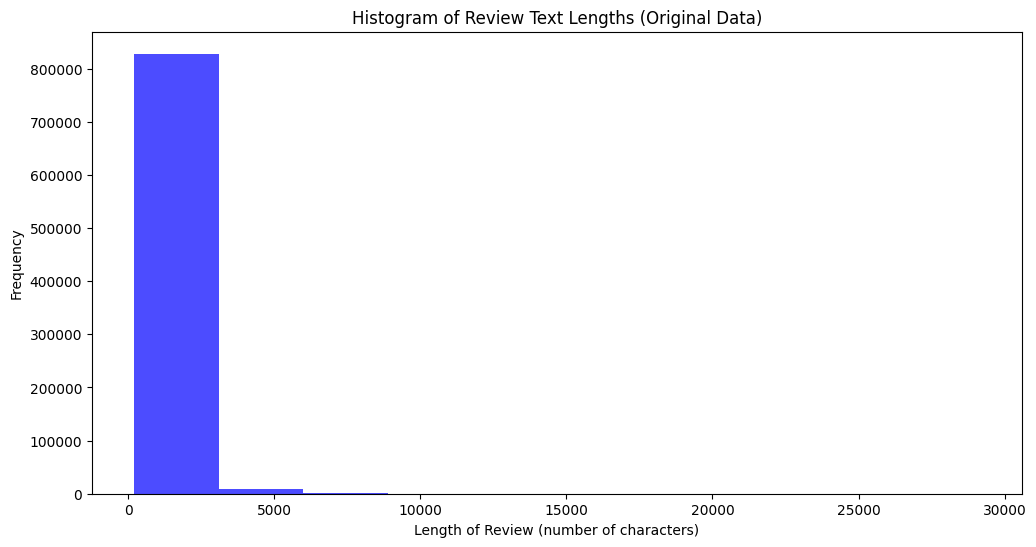

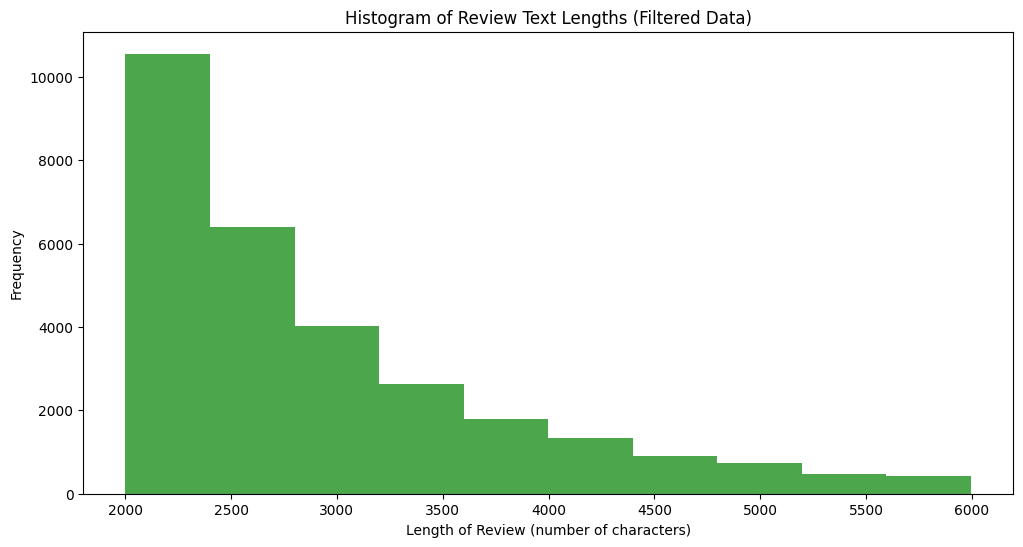

In [13]:
import matplotlib.pyplot as plt

# df_train['review_length'] = df_train['reviewText'].astype(str).apply(len)
number_of_characters = Train_data['reviewText'].astype(str).apply(len)

plt.figure(figsize=(12, 6))
plt.hist(number_of_characters, bins=10, color='blue', alpha=0.7)
plt.xlabel('Length of Review (number of characters)')
plt.ylabel('Frequency')
plt.title('Histogram of Review Text Lengths (Original Data)')
plt.show()

filtered_review_lengths = number_of_characters[(number_of_characters > 2000) & (number_of_characters < 6000)]

plt.figure(figsize=(12, 6))
plt.hist(filtered_review_lengths, bins=10, color='green', alpha=0.7)
plt.xlabel('Length of Review (number of characters)')
plt.ylabel('Frequency')
plt.title('Histogram of Review Text Lengths (Filtered Data)')
plt.show()

<h3 align=right style="line-height:200%;font-family:Mitra;color: #0099cc">
<font face="mitra">محدودیت تعداد کاراکتر
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:mitra;font-size:medium">
<font face="mitra" size=3>
تعداد کاراکتر تقریبا مناسب است و خیلی متفاوت نیست. اما برای تسریع روند و افزایش دقت میتوان بالانس کرده و بیش از 4500 کلمه را فیلتر کرد. اما نسخه قبل تفاوتی ایجاد نخواهد کرد.</font>
</p>


**Question 5**---------

In [54]:
# Train_data.sort_values(by=['overall','vote'],ascending=False).reset_index().drop(columns ='index').head(10)

# import pandas as pd

top_rated_products = merged_data[merged_data['overall'] == 5]

top_rated_counts = top_rated_products.groupby(['brand', 'title']).size().reset_index(name='count of 5')

top_10_products = top_rated_counts.sort_values(by='count of 5', ascending=False).head(10)

top_10_products


,brand,title,count of 5
10992,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Splashproof Portable Bluetooth Speaker with Volume Bo...,1163
39460,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
49185,Roku,Roku Streaming Stick (3600R) - HD Streaming Player with Quad-Core Processor,600
56451,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATAIDE),598
34377,Logitech,"Logitech M570 Wireless Trackball Mouse &ndash; Ergonomic Design with Sculpted Right-hand Shape, ...",552
51240,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Internal SSD (MZ-75E500B/AM),529
39416,NETGEAR,"NETGEAR 5-Port Gigabit Ethernet Unmanaged Switch, Sturdy Metal, Desktop, Plug-and-Play, ProSAFE ...",482
5073,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up to 3167 Mbps) with MU-MIMO to ensure Lag-Free Gam...,471
63425,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&quot;-55&quot; LED LCD Plasma Flat Screen Monitor up...,448
12377,Cheetah,Cheetah Mounts APFMSB TV Wall Mount Bracket for 20-55&rdquo; TVs Up To VESA 400 and 115 lbs incl...,434


**ًQuestion 6**---------

In [55]:
result = pd.merge(Train_data, Title_brand, on='asin', how='left')

result['vote'] = pd.to_numeric(result['vote'], errors='coerce').fillna(0)


result = result.groupby('brand').agg({'vote': 'sum', 'overall': 'mean'}).reset_index()

result = result.sort_values(by=['vote'], ascending=False)

import pandas as pd

pd.options.display.max_colwidth = 100  # Increase display width for better visualization

result[['brand','overall']].head(10)


,brand,overall
10423,Samsung,3.941268
10924,Sony,3.938726
1091,Asus,3.855550
2396,Canon,4.412507
6835,LG,3.871222
790,AmazonBasics,4.201468
11509,TP-LINK,3.928681
3274,Dell,3.864444
7219,Logitech,3.954061
4872,Garmin,3.812094
